# Comparing similarity judgments among blind individuals to word embeddings

Sean Trott (4/16/2019)

## Load verbs

In [1]:
import pandas as pd

from tqdm import tqdm

In [2]:
df_verbs = pd.read_csv("data/verb_frequencies.csv")

In [3]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7


## Obtain word embeddings for each word

In [10]:
from allennlp.commands.elmo import ElmoEmbedder

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [11]:
elmo = ElmoEmbedder()

In [8]:
embeddings = []
contextualized_embeddings = []
for verb in tqdm(list(df_verbs['verb'])):
    embedding = elmo.embed_sentence([verb])
    decontextualized = embedding[0][0].tolist()
    
    contextualized = elmo.embed_sentence(["it", "seems", "to", verb])[0][-1].tolist()
    
    embeddings.append(decontextualized)
    contextualized_embeddings.append(contextualized)

100%|██████████| 105/105 [00:58<00:00,  1.52it/s]


In [9]:
df_verbs['embedding'] = embeddings
df_verbs['contextualized_embedding'] = contextualized_embeddings

## Dimensionality reduce

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(contextualized_embeddings)

In [12]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [13]:
# Kind of ugly, fix later
df_verbs['pc1'] = list(principalDf['pc1'])
df_verbs['pc2'] = list(principalDf['pc2'])

In [14]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length,embedding,contextualized_embedding,pc1,pc2
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5,"[-0.03797150403261185, 0.18279701471328735, -0...","[-0.03797150403261185, 0.18279701471328735, -0...",-0.078174,-2.296019
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5,"[-0.2869924306869507, -1.3215936422348022, 1.4...","[-0.2869924306869507, -1.3215936422348022, 1.4...",-2.234113,2.966188
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5,"[0.12033633142709732, 1.394661545753479, 0.059...","[0.12033633142709732, 1.394661545753479, 0.059...",-2.212728,0.495540
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5,"[0.2201690673828125, 0.06947101652622223, -0.7...","[0.2201690673828125, 0.06947101652622223, -0.7...",-3.475910,0.087731
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7,"[-0.33750277757644653, 0.289326548576355, 0.46...","[-0.33750277757644653, 0.289326548576355, 0.46...",-4.540953,2.311414


## Plot

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

<IPython.core.display.Javascript object>


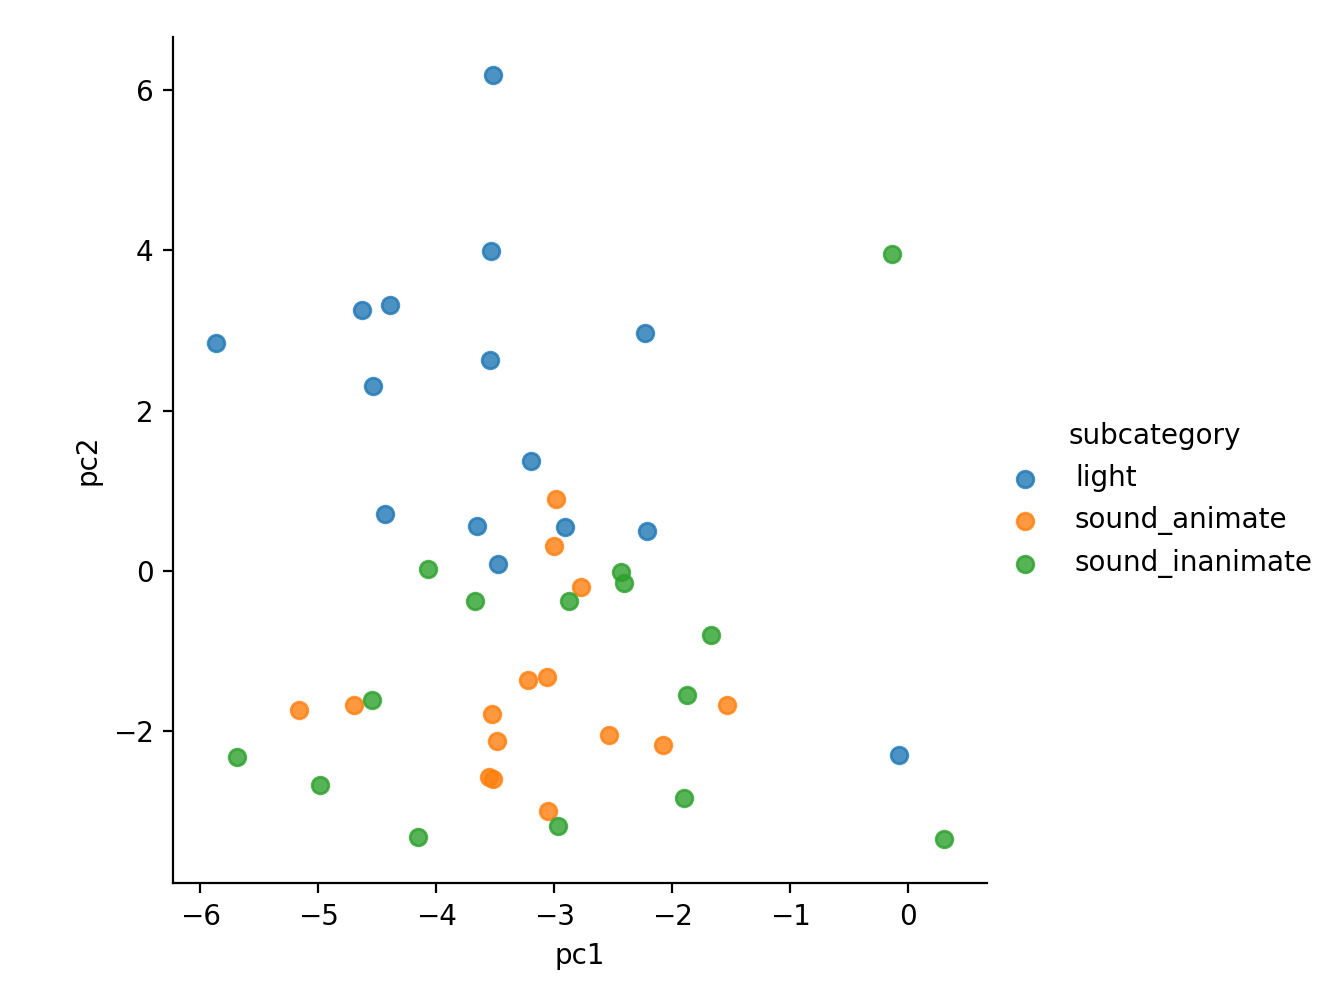

In [20]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="emission"], 
           fit_reg=False, hue='subcategory', 
           legend=True)

<IPython.core.display.Javascript object>


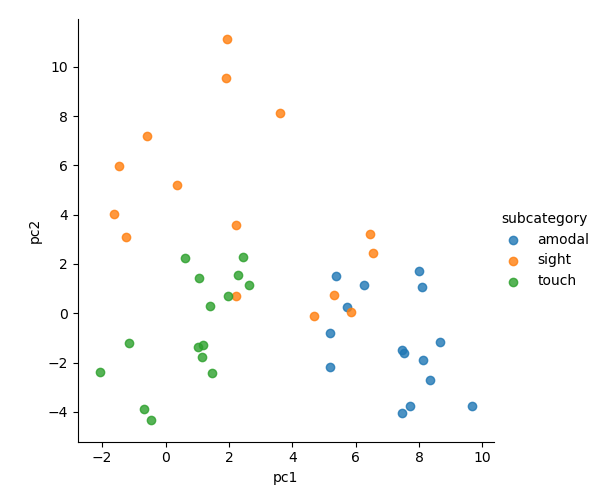

In [47]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="perception"], 
           fit_reg=False, hue='subcategory',
           legend=True)

## Hierarchical clustering

### For sight perception

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage  

In [44]:
df_sighted = df_verbs[df_verbs['subcategory']=="sight"]
len(df_sighted)

15

In [45]:
X = df_sighted[['pc1', 'pc2']].values

In [46]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


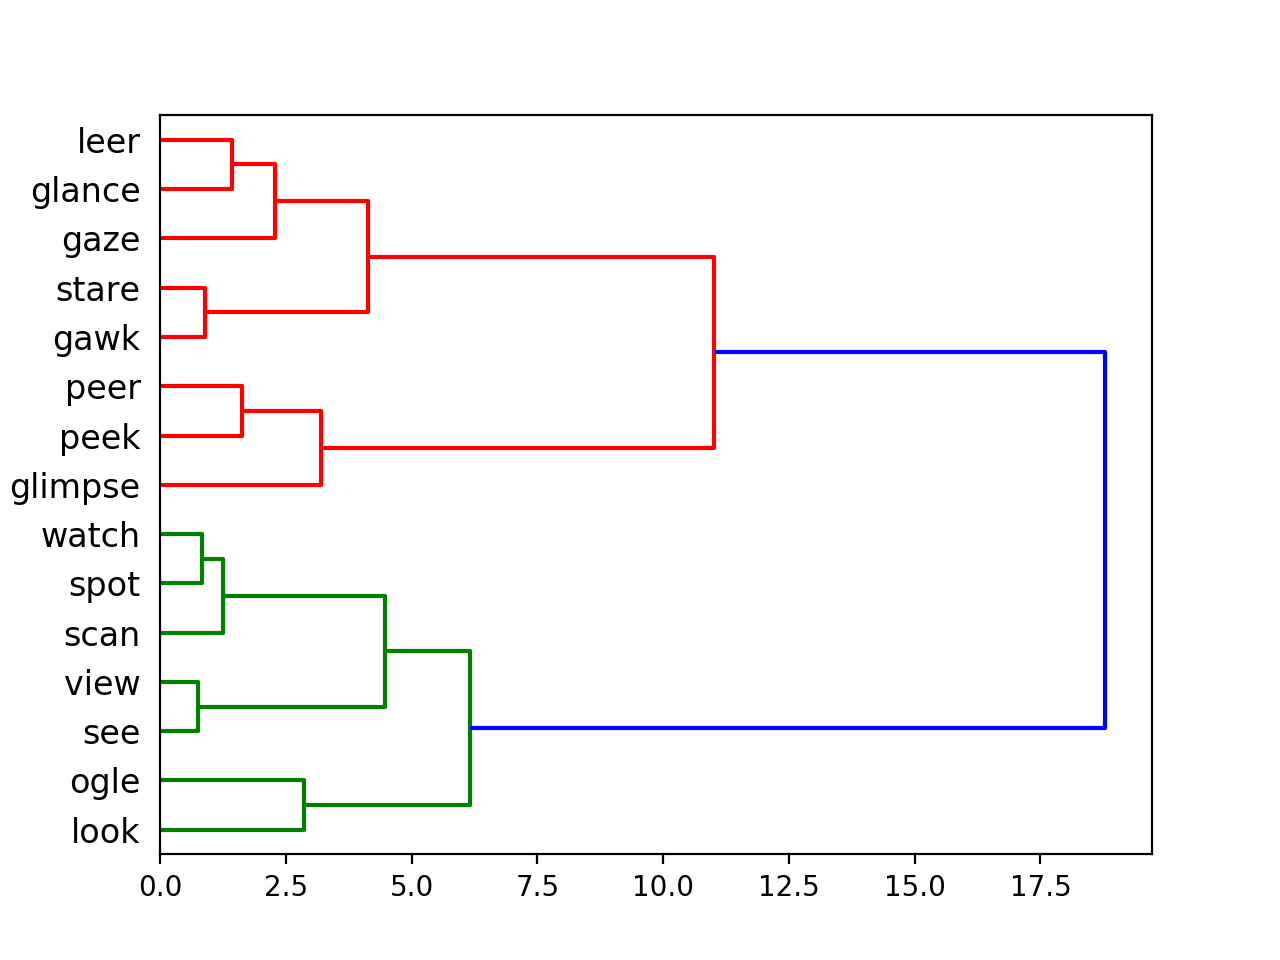

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [82.5, 82.5, 121.25, 121.25],
  [25.625, 25.625, 101.875, 101.875]],
 'dcoord': [[0.0, 2.8561866566163503, 2.8561866566163503, 0.0],
  [0.0, 0.7464899859086013, 0.7464899859086013, 0.0],
  [0.0, 0.8262870277882082, 0.8262870277882082, 0.0],
  [0.0, 1.2522339969939527, 1.2522339969939527, 0.8262870277882082],
  [0.7464899859086013,
   4.470328258991112,
   4.470328258991112,
   1.2522339969939527],
  [2.8561866566163503,
   6.1640998869446975,
   6.1640998869446975,
   4.470328258991112],
  [0.0, 1.6351096591008318, 1.6351096591008318, 0.0],
  [0.0, 3.191288392244794, 3.191288392244794, 1.6351096591008318],
  [0.0, 0.898040215997

In [47]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_sighted['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### For light emission

In [27]:
df_light = df_verbs[df_verbs['subcategory']=="light"]
len(df_sighted)

15

In [28]:
X = df_light[['pc1', 'pc2']].values

In [29]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


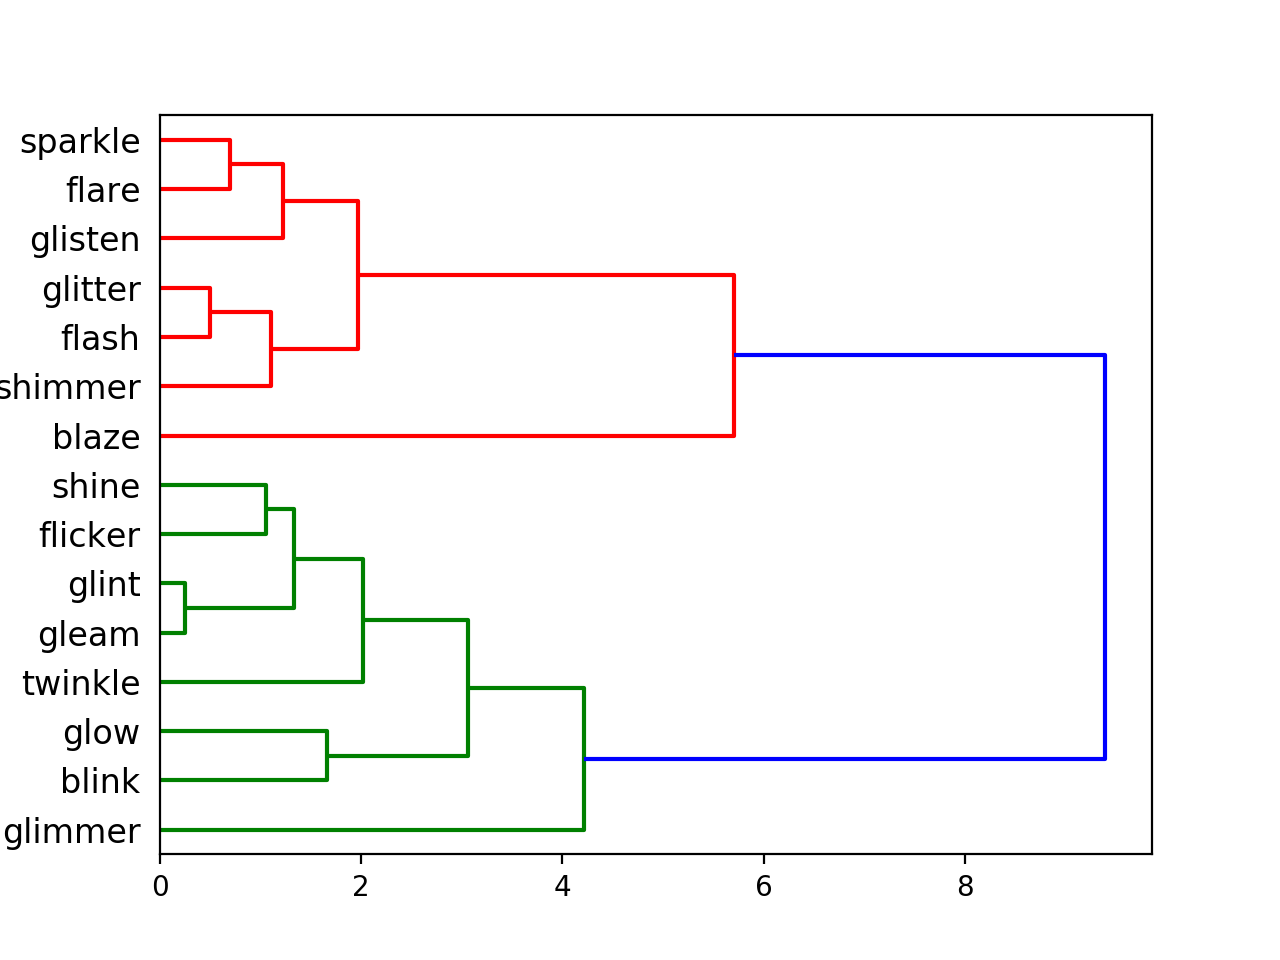

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [20.0, 20.0, 47.5, 47.5],
  [5.0, 5.0, 33.75, 33.75],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [85.0, 85.0, 117.5, 117.5],
  [19.375, 19.375, 101.25, 101.25]],
 'dcoord': [[0.0, 1.6606391747967626, 1.6606391747967626, 0.0],
  [0.0, 0.24939209264574427, 0.24939209264574427, 0.0],
  [0.0, 1.0506662803029865, 1.0506662803029865, 0.0],
  [0.24939209264574427,
   1.3283476283684057,
   1.3283476283684057,
   1.0506662803029865],
  [0.0, 2.0168134062303125, 2.0168134062303125, 1.3283476283684057],
  [1.6606391747967626,
   3.064497984967882,
   3.064497984967882,
   2.0168134062303125],
  [0.0, 4.219423802207984, 4.219423802207984, 3.064497984967882],
  [0.0, 0.5010313581663265, 0.5010313581663265, 0.0],
  [0.0, 1.10420619463

In [30]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_light['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### For touch

In [58]:
df_touch = df_verbs[df_verbs['subcategory']=="touch"]
len(df_sighted)

15

In [59]:
X = df_touch[['pc1', 'pc2']].values

In [60]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


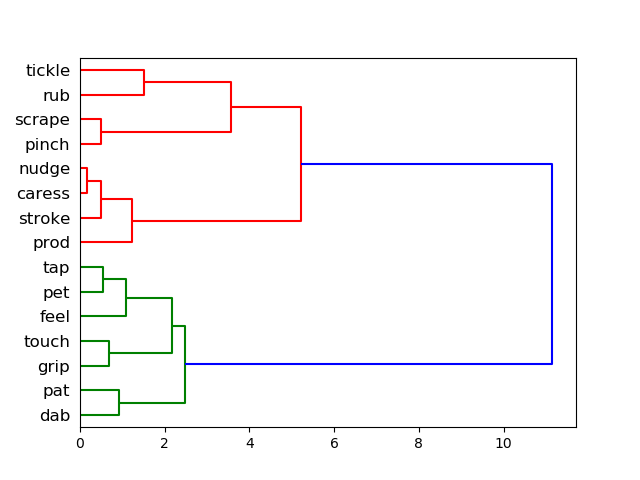

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [83.75, 83.75, 130.0, 130.0],
  [25.625, 25.625, 106.875, 106.875]],
 'dcoord': [[0.0, 0.918622408342187, 0.918622408342187, 0.0],
  [0.0, 0.6766529497558837, 0.6766529497558837, 0.0],
  [0.0, 0.5431524636314096, 0.5431524636314096, 0.0],
  [0.0, 1.0871469289062676, 1.0871469289062676, 0.5431524636314096],
  [0.6766529497558837,
   2.1628607683607735,
   2.1628607683607735,
   1.0871469289062676],
  [0.918622408342187,
   2.4893964160628586,
   2.4893964160628586,
   2.1628607683607735],
  [0.0, 0.1718506922575664, 0.1718506922575664, 0.0],
  [0.0, 0.5025162059994935, 0.5025162059994935, 0.1718506922575664],
  [0.0, 1.2237175180

In [61]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_touch['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### For touch

In [40]:
df_motion = df_verbs[df_verbs['subcategory']=="motion"]

In [41]:
X = df_motion[['pc1', 'pc2']].values

In [42]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


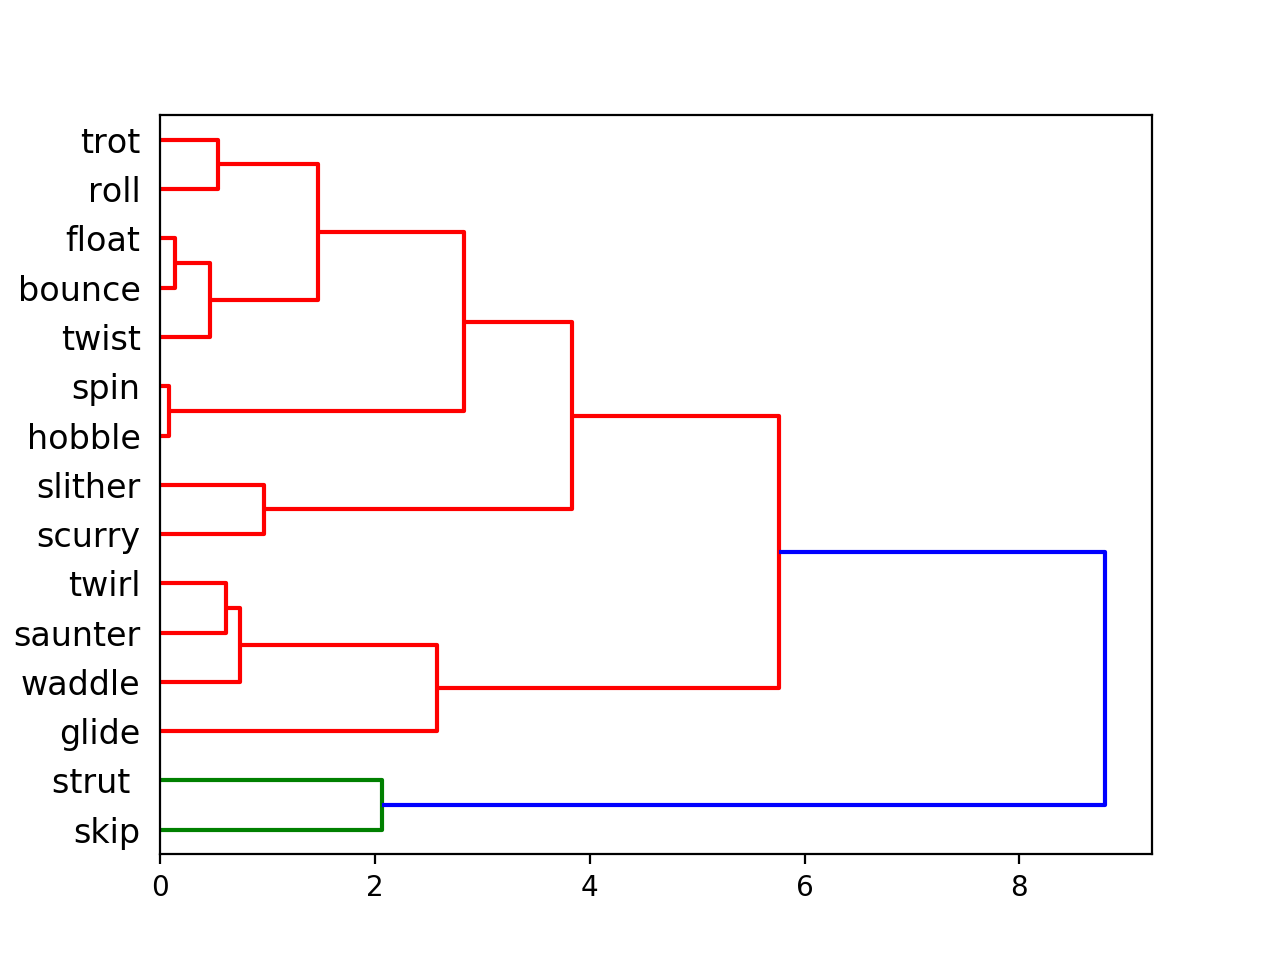

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [112.5, 112.5, 140.0, 140.0],
  [90.0, 90.0, 126.25, 126.25],
  [70.0, 70.0, 108.125, 108.125],
  [33.75, 33.75, 89.0625, 89.0625],
  [10.0, 10.0, 61.40625, 61.40625]],
 'dcoord': [[0.0, 2.0650950130357373, 2.0650950130357373, 0.0],
  [0.0, 0.6142106202064125, 0.6142106202064125, 0.0],
  [0.0, 0.744374098472773, 0.744374098472773, 0.6142106202064125],
  [0.0, 2.5770824311087592, 2.5770824311087592, 0.744374098472773],
  [0.0, 0.9713536487733226, 0.9713536487733226, 0.0],
  [0.0, 0.08238660890304238, 0.08238660890304238, 0.0],
  [0.0, 0.1350249845539128, 0.1350249845539128, 0.0],
  [0.0, 0.46946909799910935, 0.46946909799910935, 0.1350249845539128],
  [0.0, 0.5383470208395471, 0.5383470208395471, 0.0],
  [0.4694690979

In [43]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_motion['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### save to file

In [62]:
df_verbs.to_csv("data/processed/verbs_with_embeddings.csv")

## Get all similarities

In [4]:
df_verbs = pd.read_csv("data/processed/verbs_with_embeddings.csv")

In [15]:
import itertools
import scipy
import ast

In [32]:
similarities = []
for w1, w2 in tqdm(list(itertools.combinations(list(df_verbs['verb']), 2))):

    w1_embedding = ast.literal_eval(df_verbs[df_verbs['verb']==w1]['contextualized_embedding'].iloc[0])
    w2_embedding = ast.literal_eval(df_verbs[df_verbs['verb']==w2]['contextualized_embedding'].iloc[0])
    
    sim = scipy.spatial.distance.cosine(w1_embedding, w2_embedding)
    
    similarities.append({
        'w1': w1,
        'w2': w2,
        'cosine_distance': sim
    })

100%|██████████| 5460/5460 [02:57<00:00, 30.26it/s]  


In [21]:
import ast

In [33]:
df_similarities = pd.DataFrame(similarities)

In [35]:
df_similarities.to_csv("data/processed/verb_embedding_distances.csv")